<a href="https://colab.research.google.com/github/sunkusun9/ML2022_1/blob/main/univariate_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 한글 폰트 설정
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 다시 시작 필요

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,263 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124013 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truety

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False

# 단일 변수 선형 회귀 모델



$\hat{y}=\beta_0 + \beta_1x$



In [3]:
import numpy as np

## 선형 회귀 분석을 보이기 위한 임의의 데이터 생성

In [4]:
# 표준정규분포(평균=0, 분산=1인 정규분포)를 따르는 임의의 변수 100개를 생성
n = 100
np.random.seed(42)
x = np.random.normal(size=n)

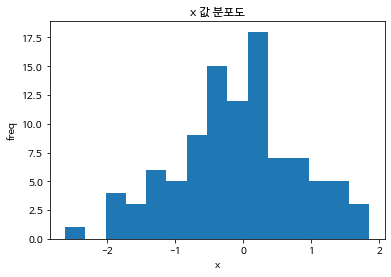

In [5]:
# x의 히스토그램 
plt.hist(x, bins=15)
plt.xlabel("x")
plt.ylabel("freq")
plt.title("x 값 분포도")
plt.show()

In [102]:
# 기울기가 beta_1, 절편이 beta_0 이고 표준편차를 0.2의 노이즈를 주어 y값을 생성
beta_0, beta_1, noise = 2.5, 3.2, 1.0
eps = np.random.normal(scale=0.2, size=n)
y = x * beta_1 + beta_0 + eps

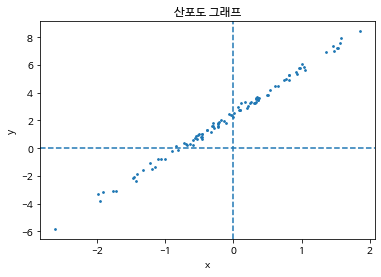

In [7]:
# x, y의 산포도 그래프 출력
plt.scatter(x, y, s=3)
plt.axhline(0, linestyle='dashed')
plt.axvline(0, linestyle='dashed')
plt.xlabel("x")
plt.ylabel("y")
plt.title("산포도 그래프")
plt.show()

# 정규방정식(Ordinary Least Squares) - I

Ordinary Least Squares 방법으로,

임의로 생성한 데이터셋으로 단일변수 선형회귀모델을 학습시켜보자.

$\hat{\beta_1}=\frac{\sum\limits_{i=1}^{n}(x_i-\bar{x})y_i}{\sum\limits_{i=1}^{n}(x_i-\bar{x})^2}$,  $\hat{\beta_0}=\bar{y} - \beta_1\bar{x}$

$\bar{x}=\frac{\sum\limits_{i=1}^{n}x_i}{n}$,  $\bar{y}=\frac{\sum\limits_{i=1}^{n}y_i}{n}$

In [98]:
x_bar = np.mean(x) # X의 평균을 구한다
x_diff = (x - x_bar) # x_i와 x_bar의 차이를 구한다.
beta_1 = np.sum(x_diff * y) / np.sum(np.square(x_diff)) # beta_1을 구한다.
beta_0 = np.mean(y) - beta_1 * np.mean(x) # beta_0를 구한다.
beta_0, beta_1

(2.5014855659727933, 3.1713485679457114)

In [9]:
# Tip: np.sum(x_diff * y)는 2번의 Vector 연산이 필요이를 dot을 사용하면 한 번으로 줄일 수 있다 .
beta_1 = np.dot(x_diff, y) / np.sum(np.square(x_diff)) 
beta_1

3.171348567945711

In [10]:
%%timeit
beta_1 = np.sum(x_diff * y) / np.sum(np.square(x_diff)) # beta_1을 구한다.

19.8 µs ± 7.36 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [11]:
%%timeit
# Tip: np.sum(x_diff * y)는 2번의 Vector 연산이 필요이를 dot을 사용하면 한 번으로 줄일 수 있다 .
beta_1 = np.dot(x_diff, y) / np.sum(np.square(x_diff)) 

13.7 µs ± 5.38 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


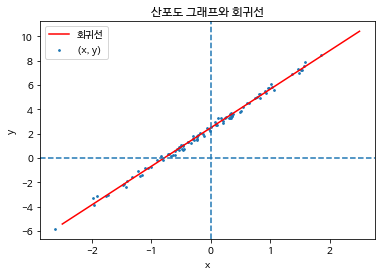

In [12]:
# x, y의 산포도 그래프 출력
plt.scatter(x, y, s=3, label='(x, y)')
x_space = np.linspace(-2.5, 2.5, 10)
plt.plot(x_space, beta_0 + beta_1 * x_space, c='r', label='회귀선')
plt.axhline(0, linestyle='dashed')
plt.axvline(0, linestyle='dashed')
plt.xlabel("x")
plt.ylabel("y")
plt.title("산포도 그래프와 회귀선")
plt.legend()
plt.show()

$\hat{\beta_1}=\frac{\sum\limits_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum\limits_{i=1}^{n}(x_i-\bar{x})^2}$

In [100]:
x_bar = np.mean(x)
y_bar = np.mean(y)
x_diff = (x - x_bar) # x_i와 x_bar의 차이를 구한다.
y_diff = (y - y_bar) # y_i와 y_bar의 차이를 구한다.
beta_1 = np.sum(x_diff * y_diff) / np.sum(np.square(x_diff)) # beta_1을 구한다.
beta_1

3.17134856794571

In [103]:
y_hat = beta_0 + beta_1 * x
np.mean(np.square(y - y_hat)), np.mean(np.square(eps)) # MSE와 Noise의 분산값

(0.03539044022668102, 0.03539044022668102)

# 정규방정식(Ordinary Least Squares) - II

In [14]:
# 모두 1일 열을 추가 한다.
X = np.hstack([np.ones((n, 1)), np.expand_dims(x.T, axis= 1)])

In [15]:
X.shape, X[:3]

((100, 2), array([[ 1.        ,  0.49671415],
        [ 1.        , -0.1382643 ],
        [ 1.        ,  0.64768854]]))

$\beta=(X^TX)^{-1}X^Ty$

In [16]:
# Gram Matrix 구하기
Xt_by_X = np.matmul(X.T, X)
# Gram Matrix의 역행렬 구하기
inv_Xt_by_X = np.linalg.inv(Xt_by_X)
# XT_by_y 구하기 
XT_by_y = np.matmul(X.T, y)
# beta_hat 구하기
beta_hat = np.matmul(inv_Xt_by_X, XT_by_y)
beta_hat

array([2.50148557, 3.17134857])

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(np.expand_dims(x, axis=-1), y)

LinearRegression()

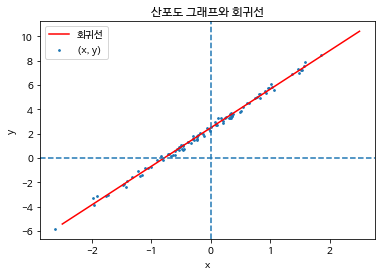

In [18]:
# x, y의 산포도 그래프 출력
plt.scatter(x, y, s=3, label='(x, y)')
plt.plot(np.linspace(-2.5, 2.5, 10), lr.predict(np.expand_dims(np.linspace(-2.5, 2.5, 10), -1)), c='r', label='회귀선')
plt.axhline(0, linestyle='dashed')
plt.axvline(0, linestyle='dashed')
plt.xlabel("x")
plt.ylabel("y")
plt.title("산포도 그래프와 회귀선")
plt.legend()
plt.show()

In [19]:
lr.coef_, lr.intercept_

(array([3.17134857]), 2.5014855659727933)

# 경사하강법(Gradient Descent)

예제)
경사하강법으로 $y=(x-2)^2 + 3$의 y를 최소로 하는 x의 값을 구하기

In [20]:
X = np.linspace(-1, 5, 1000)
optimal = 3
optimal_x = 2
Y = np.square(X - optimal_x) + optimal

In [21]:
#x =np.random.rand(1)[0] * 3 # [-3, 3]에서 임의 값으로 지정
x = -1
x_hist = [x] # X값의 history
epochs = 5 # 반복 횟수
rate = 0.3 # 이동 비율
for i in range(epochs):
    delta_y = 2 * (x - 2) # 미분값을 구한다
    x -= rate * delta_y # x값을 업데이트 한다.
    x_hist.append(x) # X값 history에 추가

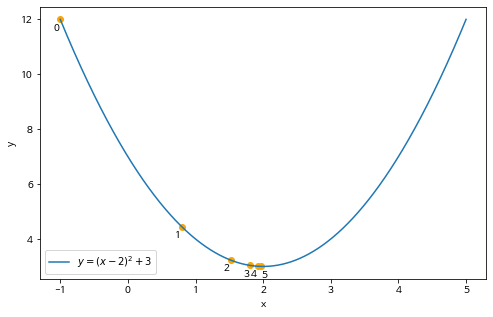

In [22]:
import matplotlib.lines as mlines
plt.figure(figsize=(8, 5)) # 표 설정
plt.plot(X, Y, label="$y=(x-2)^2 + 3$") # X, Y 그래프 출력
# x, y 변화점 출력
x_hist = np.array(x_hist)
y_hist = np.square(x_hist - 2) + 3
plt.scatter(x_hist, y_hist, c='orange')
for i, (x_, y_) in enumerate(zip(x_hist, y_hist)):
    plt.annotate(str(i), (x_, y_), xytext=(x_ - (0.1 if i < 5 else 0.0), y_ - 0.4))
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## 이동폭 (step size)

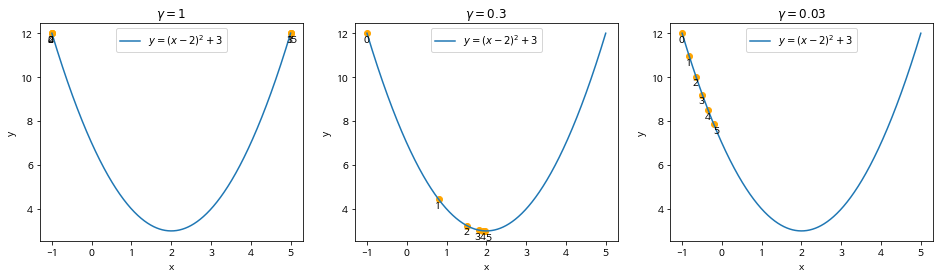

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4)) # 1x3 표 생성
for rate, ax_ in zip([1, 0.3, 0.03], ax): # 이동폭을 [1, 0.3, 0.01]에 대한 반복, 결과 ax도 묶어서 반복한다.
    # 경사하강으로 최적화
    x = -1
    x_hist = [x] 
    epochs = 5 # 반복 횟수
    for i in range(epochs):
        delta_y = 2 * (x - 2)
        x -= rate * delta_y
        x_hist.append(x)
    # 표출력
    ax_.plot(X, Y, label="$y=(x-2)^2 + 3$")
    x_hist = np.array(x_hist)
    y_hist = np.square(x_hist - 2) + 3
    ax_.scatter(x_hist, y_hist, c='orange')
    for i, (x_, y_) in enumerate(zip(x_hist, y_hist)):
        ax_.annotate(str(i), (x_, y_), xytext=(x_ - (0.1 if i < 5 else 0.0), y_ - 0.4)) # 단계출력
    ax_.set_xlabel("x")
    ax_.set_ylabel("y")
    ax_.legend()
    ax_.set_title("$\gamma={}$".format(rate))
plt.show()

## 반복횟수(epochs)

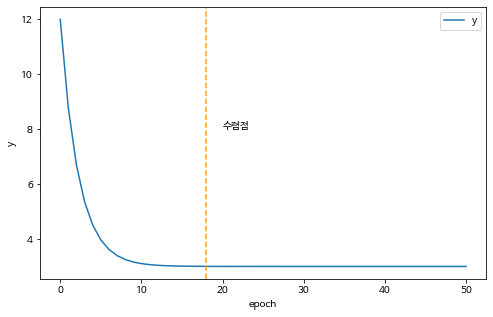

In [36]:
x = -1
y = (x - 2) ** 2 + 3
x_hist = [x]
y_hist = [y]
rate = 0.1
epochs = 50 # 반복 횟수
converge_thres = 1e-2 # 수렴점
converge_cnt = 0 # 수렴점이하로 유지된 반복수
converge_max_cnt = 5 # 수렴이라 결정할 때의 최대 converge_cnt
converge_iter = -1
for i in range(epochs):
    prev_y = y # y_diff(y의 변화값)을 구하기 위해 저장
    delta_y = 2 * (x - 2)
    x -= rate * delta_y
    y = (x - 2) ** 2 + 3
    x_hist.append(x)
    y_hist.append(y)
    y_diff = prev_y - y
    if y_diff < converge_thres:
        converge_cnt +=1
        if converge_cnt >= converge_max_cnt and converge_iter < 0: # 최초의 수렴시점을 기록
            converge_iter = i + 1
    else:
        converge_cnt = 0

plt.figure(figsize=(8, 5)) # 표 설정
# epoch에 따른 y값 출력
plt.plot(y_hist, label='y')
plt.axvline(converge_iter, linestyle='--', color='orange')
plt.annotate("수렴점", (20, 8))
plt.xlabel("단계")
plt.ylabel("y")
plt.legend()
plt.show()

## 경사하강법(Gradient Descent)를 통한 선형 회귀(Linear Regression) 학습

In [104]:
# 위와 동일한 회귀 데이터셋 생성
n = 100
np.random.seed(42)
eps = np.random.normal(size=n)
beta_0, beta_1, noise = 2.5, 3.2, 1.0
y = x * beta_1 + beta_0 + eps

In [114]:
beta_0, beta_1 = np.random.rand(2) * 2 - 1 # 초기값 설정 [-1, 1]
loss_hist = []
beta_hist = [(beta_0, beta_1)]
epochs = 20

y_hat = beta_0 + beta_1 * x
learning_rate = 0.25
mse =  np.mean(np.square(y, y_hat))
loss_hist.append(mse)

In [115]:
for i in range(epochs):
    y_delta = y - beta_0 - beta_1 * x
    y_delta_by_beta_0 = -np.mean(y_delta) # beta_0의 미분값
    y_delta_by_beta_1 = -np.mean(y_delta * x) # beta_1의 미분값
    beta_0 -= y_delta_by_beta_0 * learning_rate
    beta_1 -= y_delta_by_beta_1 * learning_rate
    y_hat = beta_0 + beta_1 * x
    mse = np.mean(np.square(y - y_hat))
    beta_hist.append((beta_0, beta_1))
    loss_hist.append(mse)

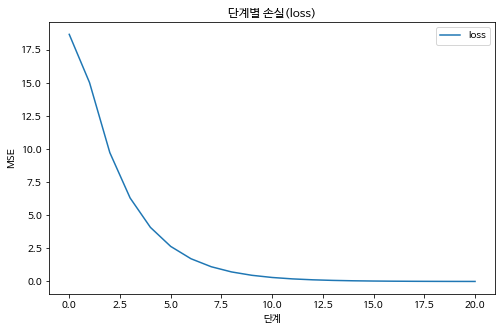

In [135]:
plt.figure(figsize=(8, 5)) # 표 설정
# epoch에 따른 y값 출력
plt.plot(loss_hist, label='loss')
plt.xlabel("단계")
plt.ylabel("MSE")
plt.legend()
plt.title("단계별 손실(loss)")
plt.show()

In [118]:
beta_0, beta_1

(2.4687682793703454, 4.135531219944396)

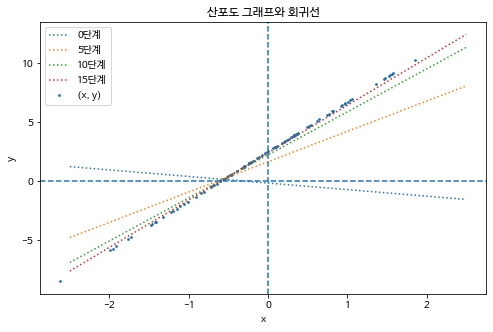

In [132]:
plt.figure(figsize=(8, 5)) # 표 설정
# x, y의 산포도 그래프 출력
plt.scatter(x, y, s=3, label='(x, y)')
x_space = np.linspace(-2.5, 2.5, 10)
# 단계별 회귀선 출력
for i in range(0,16,5): 
    beta_0, beta_1 = beta_hist[i]
    plt.plot(x_space, beta_0 + beta_1 * x_space, label='{}단계'.format(i), linestyle='dotted')
plt.axhline(0, linestyle='dashed')
plt.axvline(0, linestyle='dashed')
plt.xlabel("x")
plt.ylabel("y")
plt.title("산포도 그래프와 회귀선")
plt.legend()
plt.show()